# Introduction to Keras
[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Oct 21, 2019

In [1]:
%matplotlib inline
from tensorflow.keras import utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## 1. Linear Regression

### The data points to be fitted

In [2]:
x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0], dtype = float)
y = 3.0 * x + 2.0 + 0.5 * np.random.randn(len(x))

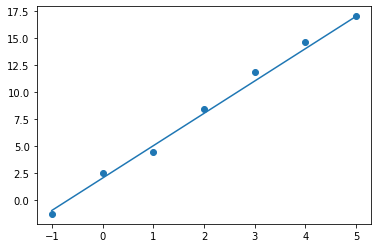

In [3]:
plt.scatter(x,y);
plt.plot(x, 3*x+2);

### Review Linear Regression with scikit-learn 

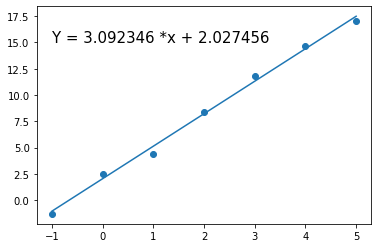

In [4]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()

# use the data points defined above
sk_x = x[:, np.newaxis]
sk_y = y

# fit the model with sklearn
sk_model.fit(sk_x, sk_y);

# make predictions
sk_yfit = sk_model.predict(sk_x)

# plot the fitted line with the equation
plt.scatter(sk_x,sk_y);
plt.plot(sk_x, sk_yfit);
plt.text(-1.0, 15, r"Y = %f *x + %f"%(sk_model.coef_, sk_model.intercept_), fontsize=15);

### Linear Regression with Keras

In [5]:
model = Sequential(Dense(units=1, input_shape=[1]))
model.compile (optimizer='sgd', loss='mean_squared_error')
model.fit(x,y,epochs=500, verbose=0);

In [6]:
yfit = model.predict(x)

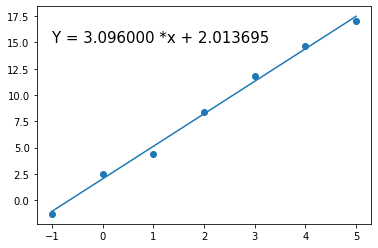

In [7]:
plt.scatter(x, y);
plt.plot(x, yfit);
plt.text(-1.0, 15, r"Y = %f *x + %f"%(tuple(model.get_weights())), fontsize=15);

## 2. Keras - All about Layers
Layers are the fundamental building blocks of Keras models. A wide variety of Keras functions are dedicated to create different kind of layers and connect them to form a deep learning network.

In [8]:
# Generate dummy data
import numpy as np

# training data set 1000 row, 20 columns
x_train = np.random.random((1000, 20))
y_train = utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)

# testing data set 100 row, 20 columns
x_test = np.random.random((100, 20))
y_test = utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

In [9]:
# The simplest type of model is a linear stack of layers. 
model = Sequential([
     Dense(units=64, activation='relu', input_dim=20),
     Dense(units=10, activation='softmax')
    ])

# instead of adding all the layers as a list, each layer could be added separately.
#model = Sequential()
#model.add(Dense(units=64, activation='relu'))
#model.add(Dense(units=10, activation='softmax'))

In [10]:
# configure the learning process of the model with compile()
# The optimizer could be configured with 
# optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [11]:
model.fit(x_train, y_train, epochs=5, batch_size=1000, verbose=1)

Epoch 1/5
1/1 [==============================] - 1s 955ms/step - loss: 2.4246 - accuracy: 0.0860
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 2.4218 - accuracy: 0.0860
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 2.4191 - accuracy: 0.0830
Epoch 4/5
1/1 [==============================] - 0s 24ms/step - loss: 2.4165 - accuracy: 0.0850
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 2.4140 - accuracy: 0.0850


In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                1344      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 1,994
Trainable params: 1,994
Non-trainable params: 0
_________________________________________________________________
None
